# Subject: Classical Data Analysis

## Session 4 - Working with Geopandas and ArcGIS Online 

### Demo 4 -  Set-Operations with Overlay

Installing GeoPandas

To install the released version, you can use pip:

http://geopandas.org/install.html

pip install geopandas

or you can install the conda package from the conda-forge channel:

conda install -c conda-forge geopandas

Dependencies

Installation via conda should also install all dependencies, but a complete list is as follows:

- numpy
- pandas (version 0.15.2 or later)
- shapely
- fiona
- six
- pyproj

In [42]:
import pandas as pd
import geopandas as gpd
%matplotlib inline

In [43]:
from shapely.geometry import shape,Point,Polygon,mapping

## 1. The different Overlay operations

When working with multiple spatial datasets – especially multiple polygon or line datasets – users often wish to create new shapes based on places where those datasets overlap (or don’t overlap). These manipulations are often referred using the language of sets – intersections or unions. These types of operations are made available in the geopandas library through the overlay function.

First, we create some example data:

In [44]:
polys1 = gpd.GeoSeries([Polygon([(0,0), (2,0), (2,2), (0,2)]), 
                        Polygon([(2,2), (4,2), (4,4), (2,4)])])

polys2 = gpd.GeoSeries([Polygon([(1,1), (3,1), (3,3), (1,3)]),
                        Polygon([(3,3), (5,3), (5,5), (3,5)])])

df1 = gpd.GeoDataFrame({'geometry': polys1, 'df1':[1,2]})

df2 = gpd.GeoDataFrame({'geometry': polys2, 'df2':[1,2]})

In [45]:
polys1

0    POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))
1    POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))
dtype: object

In [46]:
df1

,df1,geometry
0,1,"POLYGON ((0 0, 2 0, 2 2, 0 2, 0 0))"
1,2,"POLYGON ((2 2, 4 2, 4 4, 2 4, 2 2))"


In [47]:
polys2

0    POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))
1    POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))
dtype: object

In [48]:
df2

,df2,geometry
0,1,"POLYGON ((1 1, 3 1, 3 3, 1 3, 1 1))"
1,2,"POLYGON ((3 3, 5 3, 5 5, 3 5, 3 3))"


In [49]:
df1.geometry.name

'geometry'

In [50]:
df2.geometry.name

'geometry'

These two GeoDataFrames have some overlapping areas:

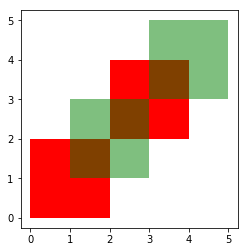

In [51]:
ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

We illustrate the different overlay modes with the above example. The overlay function will determine the set of all individual geometries from overlaying the two input GeoDataFrames. This result covers the area covered by the two input GeoDataFrames, and also preserves all unique regions defined by the combined boundaries of the two GeoDataFrames.

When using how='union', all those possible geometries are returned:

In [52]:
res_union = gpd.overlay(df1, df2, how='union')
res_union

,df1,df2,geometry
0,1.0,NaN,"POLYGON ((2 1, 2 0, 0 0, 0 2, 1 2, 1 1, 2 1))"
1,1.0,1.0,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
2,NaN,1.0,"POLYGON ((2 1, 2 2, 3 2, 3 1, 2 1))"
3,NaN,1.0,"POLYGON ((2 2, 1 2, 1 3, 2 3, 2 2))"
4,2.0,NaN,"POLYGON ((3 2, 3 3, 4 3, 4 2, 3 2))"
5,2.0,1.0,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
6,2.0,NaN,"POLYGON ((3 3, 2 3, 2 4, 3 4, 3 3))"
7,NaN,2.0,"POLYGON ((4 3, 4 4, 3 4, 3 5, 5 5, 5 3, 4 3))"
8,2.0,2.0,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


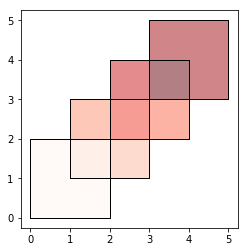

In [57]:
ax = res_union.plot(alpha=0.5, cmap='Reds')
df1.plot(ax=ax, facecolor='none', edgecolor='k')
df2.plot(ax=ax, facecolor='none', edgecolor='k')

The other how operations will return different subsets of those geometries. With how='intersection', it returns only those geometries that are contained by both GeoDataFrames:

In [62]:
res_intersection = gpd.overlay(df1, df2, how='intersection')
res_intersection

,df1,df2,geometry
0,1,1,"POLYGON ((2 1, 1 1, 1 2, 2 2, 2 1))"
1,2,1,"POLYGON ((3 3, 3 2, 2 2, 2 3, 3 3))"
2,2,2,"POLYGON ((3 4, 4 4, 4 3, 3 3, 3 4))"


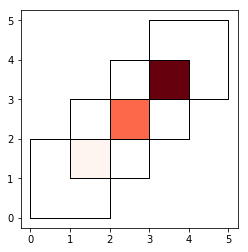

In [64]:
ax = res_intersection.plot(cmap='Reds')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');